In [19]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# 加载数据集
X_orig,y_orig = load_svmlight_file('data/australian_scale') # data from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#australian

# 划分数据集
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(X_orig, y_orig, test_size=0.2)

# 转换为列向量
X_train = X_train_orig.T.toarray()
X_val = X_val_orig.T.toarray()
y_train = np.reshape(y_train_orig,(1,y_train_orig.shape[0]))
y_val = np.reshape(y_val_orig,(1,y_val_orig.shape[0]))
print(X_train.shape,y_train.shape)

(14, 552) (1, 552)


In [21]:
# 用零初始化参数
def init_parameters_with_zeros(dim):
    W = np.zeros((dim,1))
    b = 0
    return W,b

In [22]:
# 前向传播和反向传播
def propagate(C,W,b,X,Y):
    m = X.shape[1]

    # 前向传播
    A = np.dot(W.T,X)+b
    
    # 计算cost
#     cost = np.sum(np.square(A-Y))/m
    cost = np.sum(np.square(W))/2 + C*np.sum(np.maximum(0,1-Y*(np.dot(W.T,X)+b)))/m
    
    # 反向传播
#     filt = np.zeros(Y.shape)
#     filt[(1-Y*(np.dot(W.T,X)+b))>0]=1
    filt = (1-Y*(np.dot(W.T,X)+b))>0
#     tmp = tmp.reshape(tmp.shape[1])
#     print(tmp.shape)
#     print((np.sum(Y*X*filt,axis=0)).shape)
#     print((np.sum(Y*X,axis=0)*filt).shape)
#     print(W.shape,(np.sum(Y*X,axis=0)*filt).shape,'x')
#     print('W.shape',W.shape)
#     print('X.shape',X.shape
#     print('Y.shape',Y.shape,'X.shape',X.shape,'filt.shape',filt.shape)
#     print((C*np.dot(Y*filt,X.T)/m).shape)
    dW = W - C*np.dot(Y*filt,X.T).T/m
    db = -C*np.sum(Y*filt*b)/m
#     dW = np.dot(X,(A-Y).T)*2/m
#     db = np.sum(2*(A-Y))/m
    return cost,dW,db

In [23]:
def predict(W,b,X):
    m = X.shape[1]
    A = np.dot(W.T,X)+b
    Y_prediction = np.zeros((1,m))
    Y_prediction[A>=0]=1
    Y_prediction[A<0]=-1
    return Y_prediction

In [29]:
def model(X_train, Y_train, X_val, Y_val,C = 1000, num_iterations = 200, learning_rate = 0.0001, print_cost = False):
    
    # 保存训练集和验证集上的cost、accuracy
    train_cost_log = []
    val_cost_log = []
    train_accuracy_log = []
    val_accuracy_log = []
    
    # 初始化参数
    W,b = init_parameters_with_zeros(X_train.shape[0])
    
    for i in range(num_iterations):
        # 进行前向传播、反向传播，计算cost和梯度
        train_cost, dW, db = propagate(C,W,b,X_train,Y_train)
        # 计算验证集上的cost
        val_cost,_,_= propagate(C,W,b,X_val,Y_val)
        
        Y_train_prediction = predict(W,b,X_train)
        Y_val_prediction = predict(W,b,X_val)
        
        
        # 保存cost
        train_cost_log.append(train_cost)
        val_cost_log.append(val_cost)
        
        # 更新参数
#         print("W.shape",W.shape,"dW.shape",dW.shape)
        W = W-learning_rate*dW
        b = b-learning_rate*db
        
        if print_cost and i%10==0:
            print ("After iteration %i, train cost: %f, val cost : %f， train accuracy: %f %%, test accuracy: %f %%" %(i, train_cost, val_cost, (100 - np.mean(np.abs(Y_train_prediction - Y_train)/2) * 100), (100 - np.mean(np.abs(Y_val_prediction - Y_val)/2) * 100)))

    
    return W,b,train_cost_log,val_cost_log

In [30]:
_,_,train_loss_log,val_loss_log = model(X_train,y_train,X_val,y_val,print_cost=True)

After iteration 0, train cost: 1000.000000, val cost : 1000.000000， train accuracy: 43.659420 %, test accuracy: 47.826087 %
After iteration 10, train cost: 406.259573, val cost : 413.918449， train accuracy: 86.775362 %, test accuracy: 86.231884 %
After iteration 20, train cost: 345.062547, val cost : 330.361209， train accuracy: 85.326087 %, test accuracy: 86.956522 %
After iteration 30, train cost: 319.748299, val cost : 306.897129， train accuracy: 85.144928 %, test accuracy: 86.956522 %
After iteration 40, train cost: 307.564858, val cost : 294.348615， train accuracy: 85.144928 %, test accuracy: 86.956522 %
After iteration 50, train cost: 303.567495, val cost : 288.193861， train accuracy: 85.144928 %, test accuracy: 86.956522 %
After iteration 60, train cost: 302.373779, val cost : 285.187588， train accuracy: 85.144928 %, test accuracy: 86.956522 %
After iteration 70, train cost: 301.566068, val cost : 283.548322， train accuracy: 85.144928 %, test accuracy: 86.956522 %
After iteration

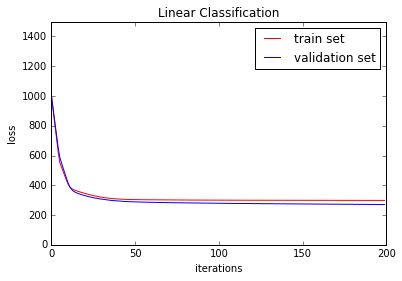

In [31]:
# 画图
plt.plot(train_loss_log,'r', label='train set')
plt.plot(val_loss_log,'b', label = 'validation set')


plt.legend() # 图例
plt.axis([0,200,0,1500])
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title('Linear Classification')
plt.show()